# Chest X-ray Analysis for Pneumonia Detection

### Team : FInal Project 16
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9016986     | Keerthi                     | Gonuguntla    |
| 8965985     | Pradeepti                   | Kasam         |

### Importing Required Libraries

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Input,GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

### Splitting the data into train, Test, validation sets 

In [2]:
# Path to the  data set folders
base_path = r"Data Set"

# creating the Folders for normal and pneumonia data for splitting of the data 
categories = ["normal", "pneumonia"]

# Creating Output directories for train, test, validation splits
output_dir = os.path.join("Final DataSet")
splits = ["train", "test", "val"]

# Creating output directories for splitting the data 
for split in splits:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Split ratio of the dataset 
train_ratio = 0.6
test_val_ratio = 0.4
test_ratio = 0.5  

# Initializing counters for the split sizes
split_sizes = {"train": 0, "test": 0, "val": 0}

# Initializing total image counters
total_normal_images = 0
total_pneumonia_images = 0

# Printing the number of images before splitting
print("Before splitting:")
for category in categories:
    category_path = os.path.join(base_path, category)
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}, skipping.")
        continue

    # Get list of all image files in the category folder
    files = os.listdir(category_path)
    files = [f for f in files if os.path.isfile(os.path.join(category_path, f))]
    category_image_count = len(files)
    
    # Add to total counts
    if category == "normal":
        total_normal_images = category_image_count
    elif category == "pneumonia":
        total_pneumonia_images = category_image_count
    
    print(f"{category.capitalize()} images before splitting: {category_image_count}")

# Printing the total images in both categories before splitting
total_images = total_normal_images + total_pneumonia_images
print(f"\nTotal images before splitting: {total_images}")

# Splitting the images into train, test, and validation
for category in categories:
    category_path = os.path.join(base_path, category)
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}, skipping.")
        continue

    # Get list of all image files in the category folder
    files = os.listdir(category_path)
    files = [f for f in files if os.path.isfile(os.path.join(category_path, f))]

    # Splitting the data into train and temp -> for test and validation
    train_files, temp_files = train_test_split(files, test_size=test_val_ratio, random_state=42)

    # Splitting temp_files into test and validation sets
    val_files, test_files = train_test_split(temp_files, test_size=test_ratio, random_state=42)

    # Moving files into respective folders and count the number of images 
    for file_list, split in [(train_files, "train"), (test_files, "test"), (val_files, "val")]:
        for file in file_list:
            src = os.path.join(category_path, file)
            dst = os.path.join(output_dir, split, category, file)

            # Move the file to the appropriate folder
            shutil.copy(src, dst)
            split_sizes[split] += 1

# Printing the number of images after splitting
print("\nAfter splitting:")
for split in splits:
    for category in categories:
        category_split_path = os.path.join(output_dir, split, category)
        if os.path.exists(category_split_path):
            split_count = len(os.listdir(category_split_path))
            print(f"{split.capitalize()} {category.capitalize()} images: {split_count}")

# Printing the size of each data set
print(f"\nTrain size: {split_sizes['train']}")
print(f"Test size: {split_sizes['test']}")
print(f"Validation size: {split_sizes['val']}")

Before splitting:
Normal images before splitting: 1583
Pneumonia images before splitting: 4272

Total images before splitting: 5855

After splitting:
Train Normal images: 949
Train Pneumonia images: 2563
Test Normal images: 317
Test Pneumonia images: 855
Val Normal images: 317
Val Pneumonia images: 854

Train size: 3512
Test size: 1172
Validation size: 1171


### 1. Data Exploration

* Examines the structure of the dataset: To verify that the data is arranged into train, test, and val directories, it prints the folder hierarchy.

* Illustrates the appearance of the data by displaying a few pictures from each group (normal vs pneumonia).

Dataset Structure (Before Visualization):
Train - Normal images: 949
Train - Pneumonia images: 2563
Test - Normal images: 317
Test - Pneumonia images: 855
Val - Normal images: 317
Val - Pneumonia images: 854

Visualizing the first 5 images for each category and split:

Train - Normal images:


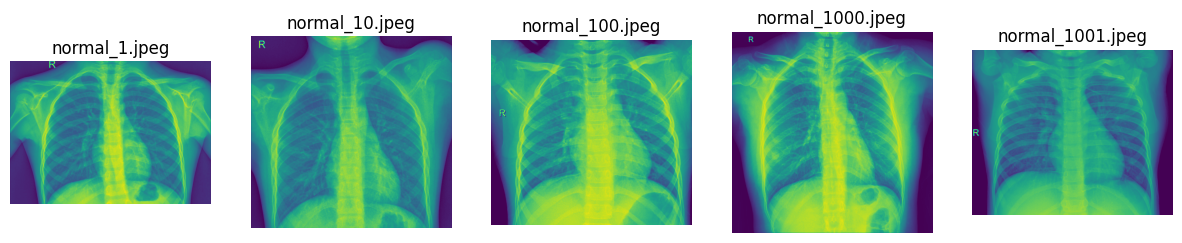


Train - Pneumonia images:


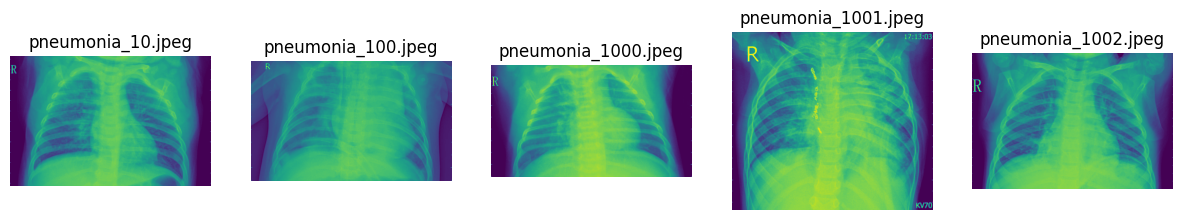


Test - Normal images:


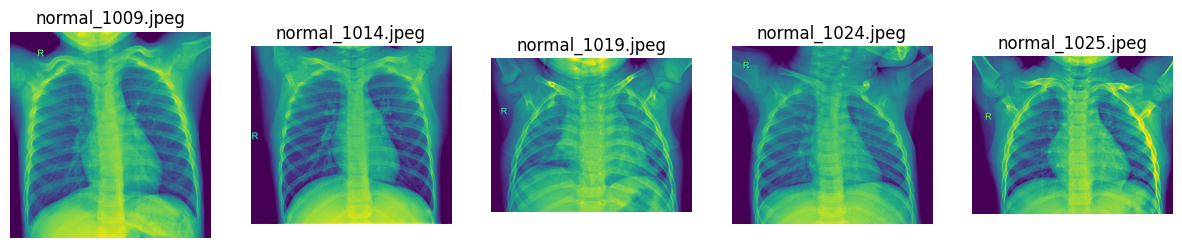


Test - Pneumonia images:


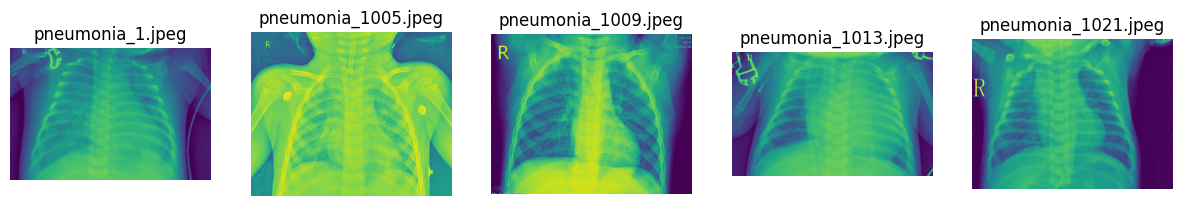


Val - Normal images:


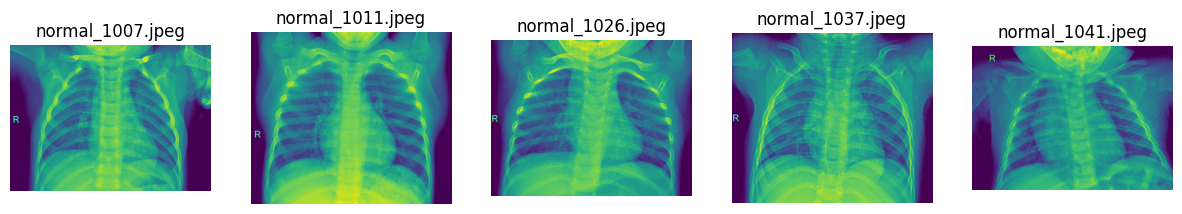


Val - Pneumonia images:


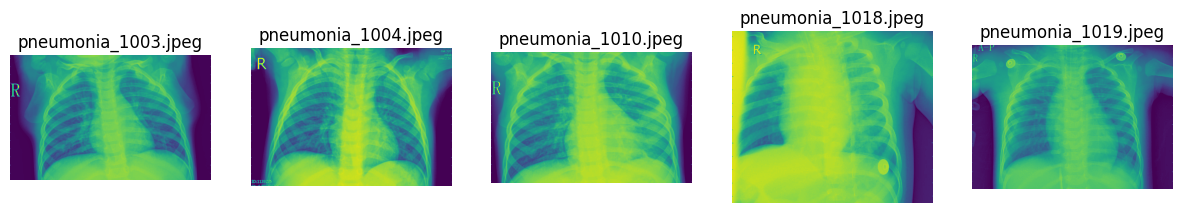

In [3]:
# Path to the train,test, validation Data Set 
base_path = "Final DataSet"
splits = ['train', 'test', 'val']
categories = ['normal', 'pneumonia']

# Function to print the number of files in a directory
def count_images_in_folder(path):
    return len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])

# Function to visualize the first 5 images in each folder
def visualize_images(split, category):
    # Get the path for the images in the specific split and category
    images_path = os.path.join(base_path, split, category)
    image_files = os.listdir(images_path)[:5]  

    # Plotting the images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(image_files):
        img_path = os.path.join(images_path, image_name)
        img = mpimg.imread(img_path)  # Reading the image
        
        plt.subplot(1, 5, i + 1)  # Arranging the images in one row with 5 columns
        plt.imshow(img)
        plt.axis('off')  
        plt.title(image_name)  # Printing the image filename as the title
        
    plt.show() #Printing the images 

# Inspect the dataset structure and print the number of images before visualization
print("Dataset Structure (Before Visualization):")
for split in splits:
    for category in categories:
        images_path = os.path.join(base_path, split, category)
        image_count = count_images_in_folder(images_path)
        print(f"{split.capitalize()} - {category.capitalize()} images: {image_count}")

# Visualizing the first 5 images for each category in each split
print("\nVisualizing the first 5 images for each category and split:")
for split in splits:
    for category in categories:
        print(f"\n{split.capitalize()} - {category.capitalize()} images:")
        visualize_images(split, category)


### 2. Preprocessing

We are applying a number of processes to the images in order to preprocess the dataset for chest X-ray pneumonia detection model. 

#### Steps for Preprocessing:

1. Convert images to grayscale (if required):

* Here in this step we will need to convert any colorful images in dataset to grayscale. However, unless dataset contains colorful images, this might not be required because chest X-ray scans are typically already in grayscale.

2. Resize images to a consistent size (224x224):

* All photos must be resized to the models needed input size, which for many pre-trained models (such as VGG16) is often 224x224.

3. Normalize pixel values to the range [0, 1]:

* Images usually have pixel values between 0 and 255.Here we are dividing the pixel values by 255 in order to normalize them to a range of [0, 1] for deep learning models.

4. Augment data using transformations such as flipping, rotation, and zoom:

* By artificially expanding the training set diversity, data augmentation can aid in enhancing the model resilience. we are performing arbitrary flips, zooms, and rotations.

#### Code Implementation for Preprocessing:

The Keras library will be used for simple picture augmentation and preprocessing. 

Found 3512 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Sample preprocessed images from the training set:



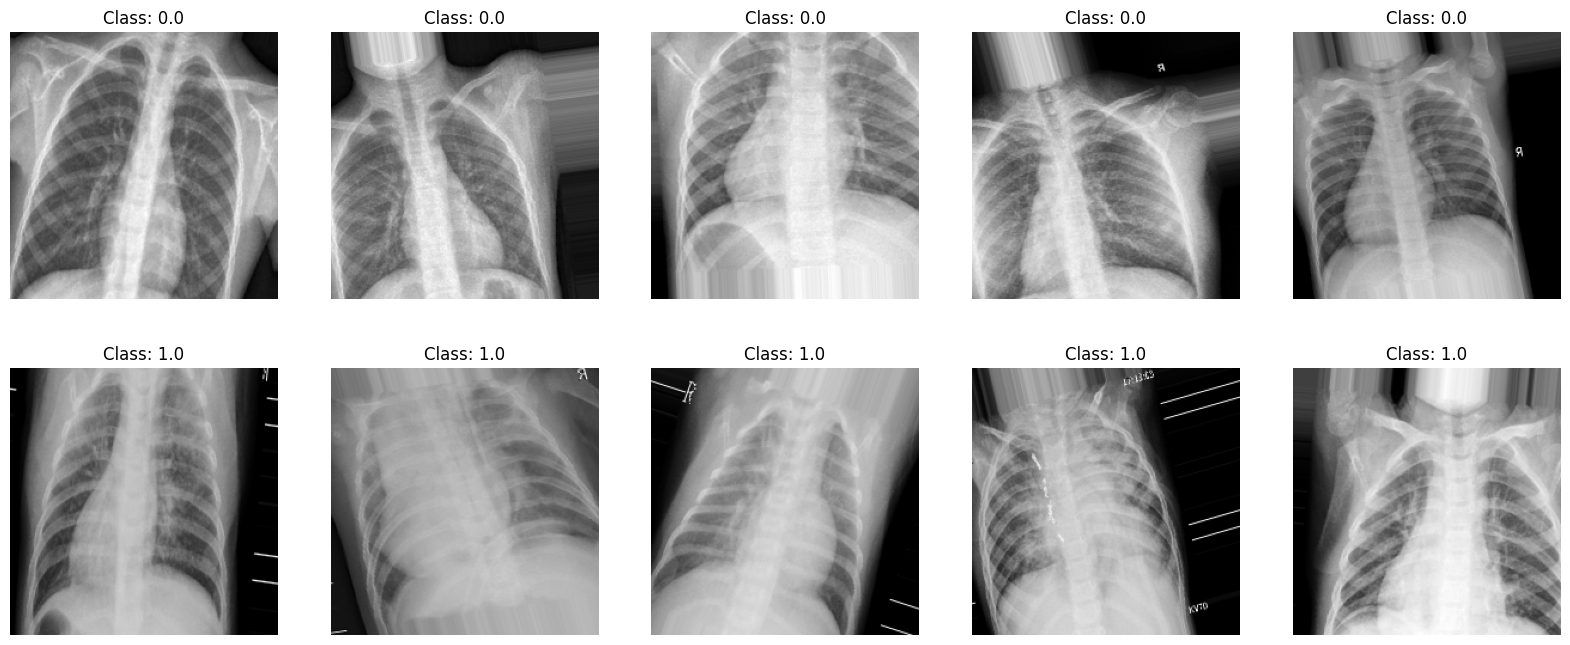

Sample augmented images from the training set:


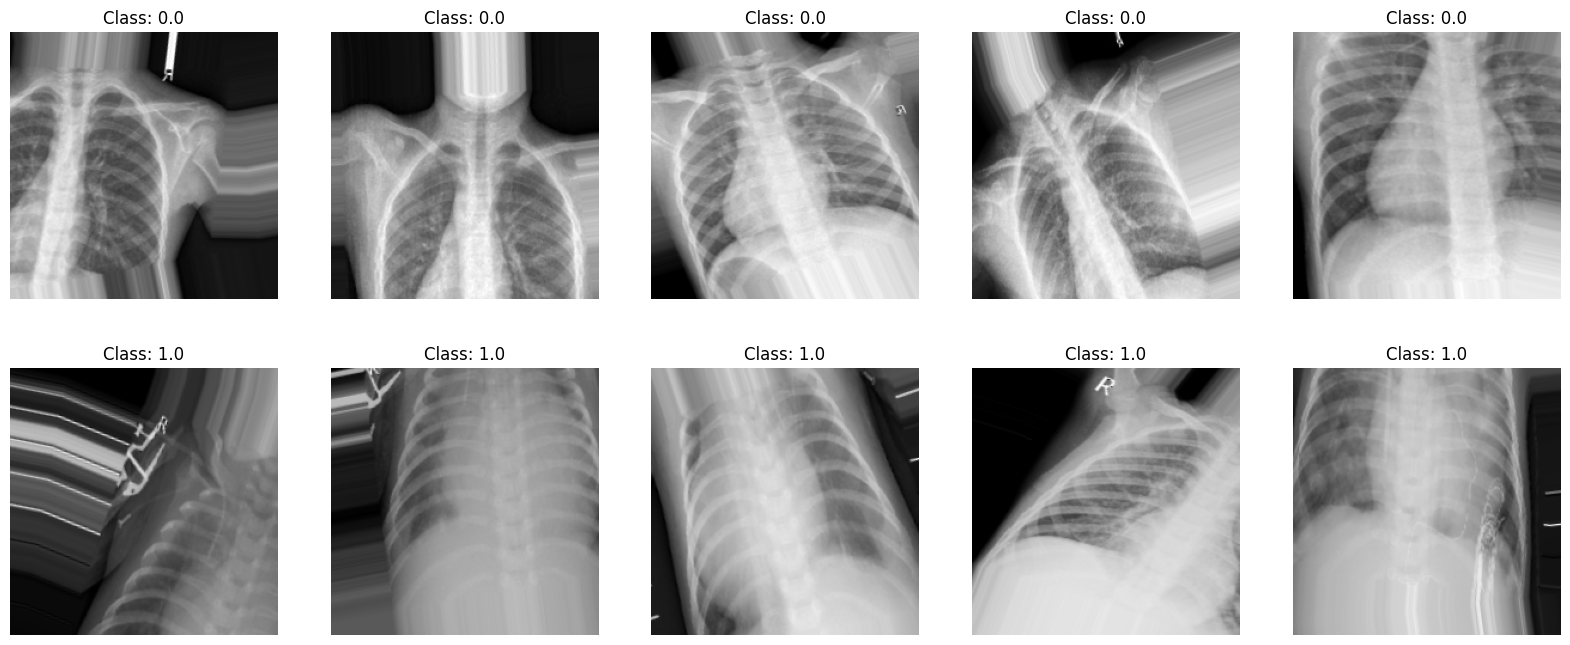

Sample preprocessed images from the validation set:


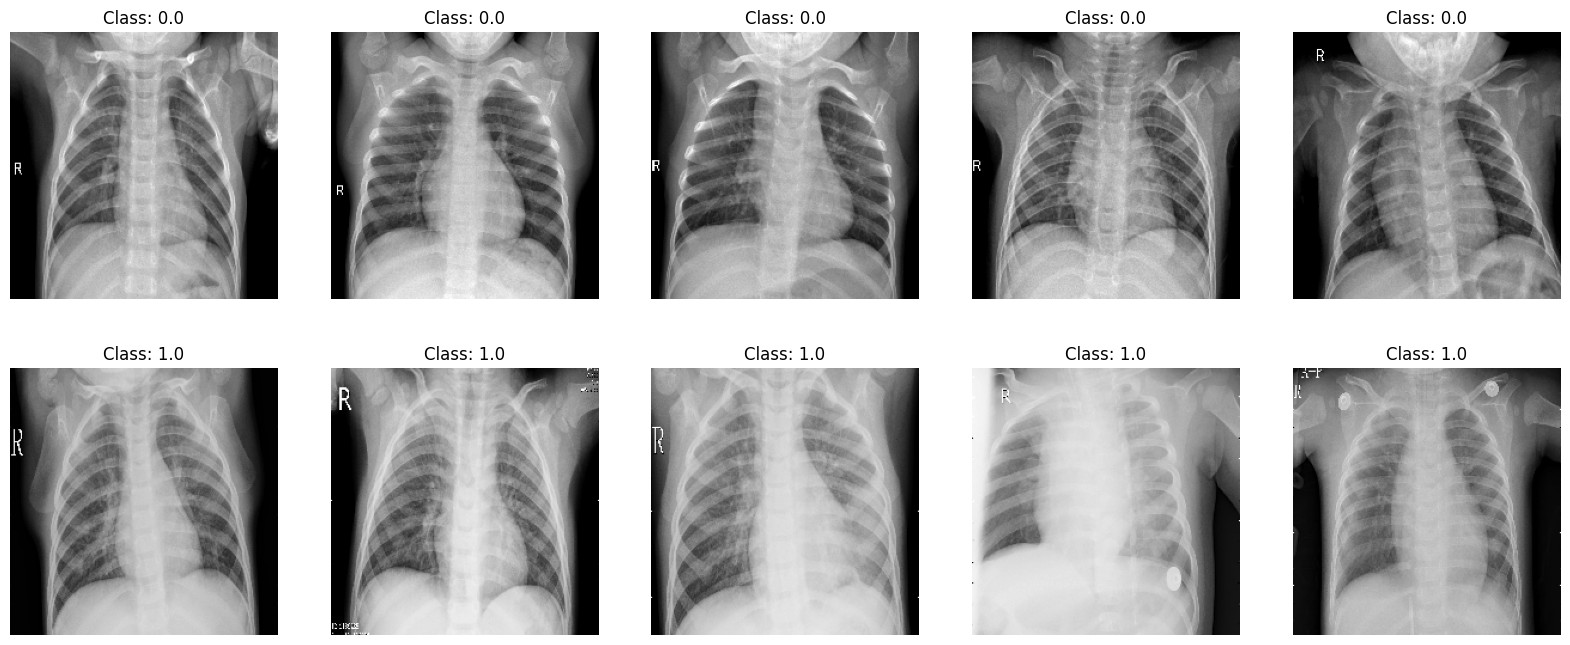

Sample augmented images from the validation set:


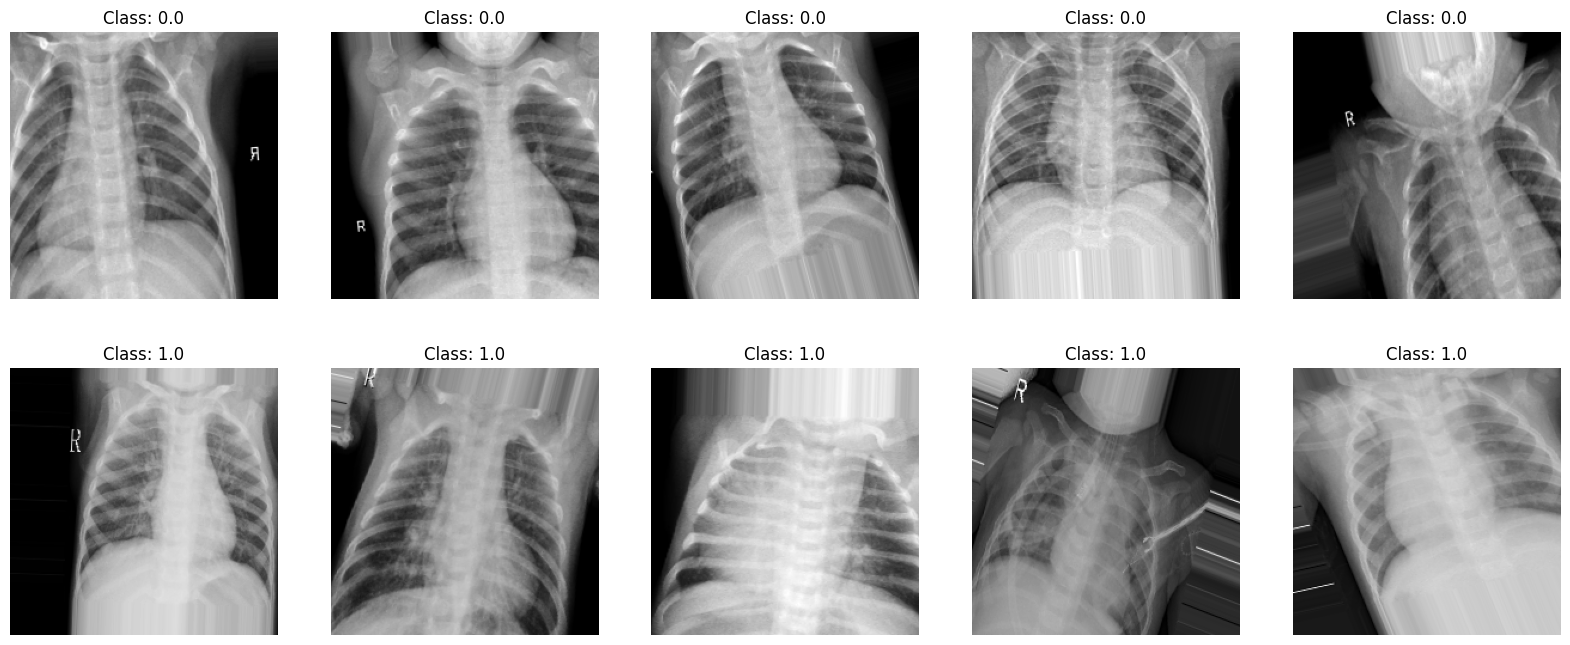

Sample preprocessed images from the test set:


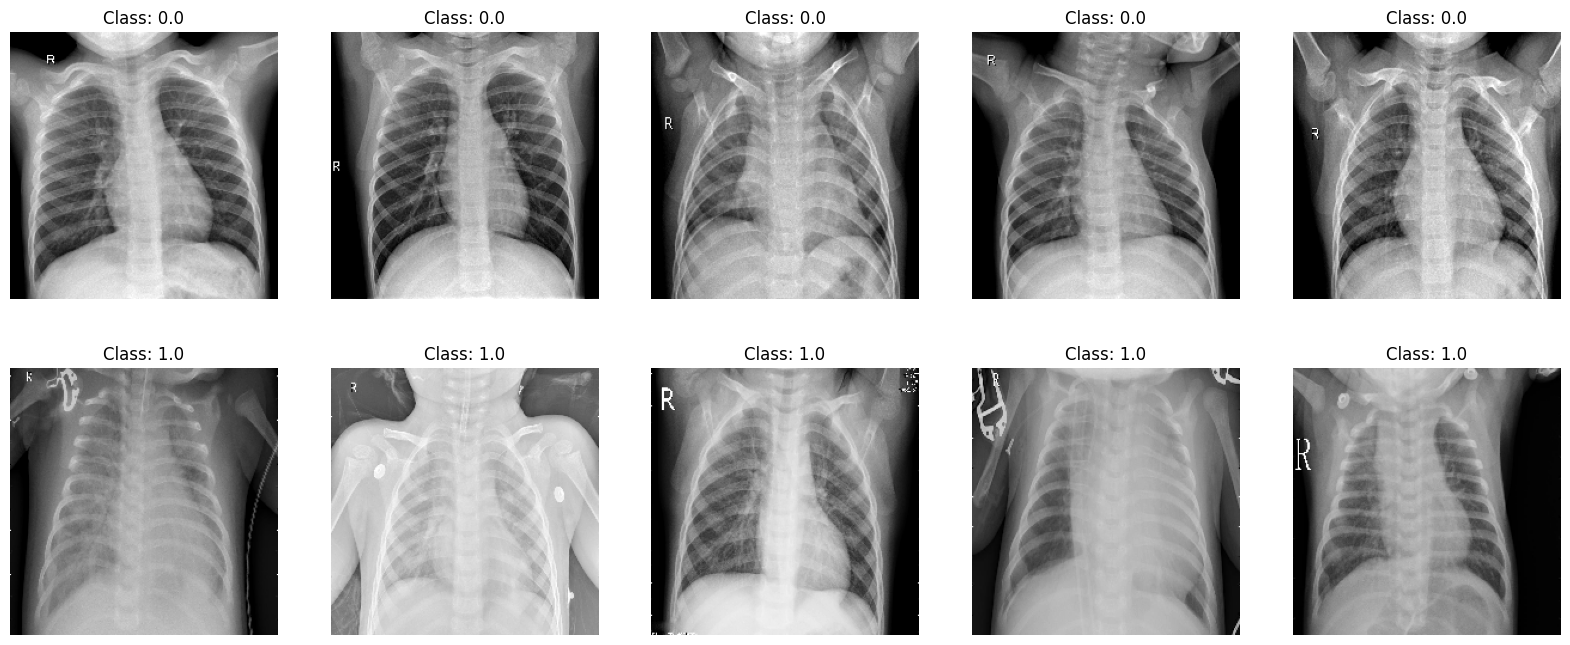

Sample augmented images from the test set:


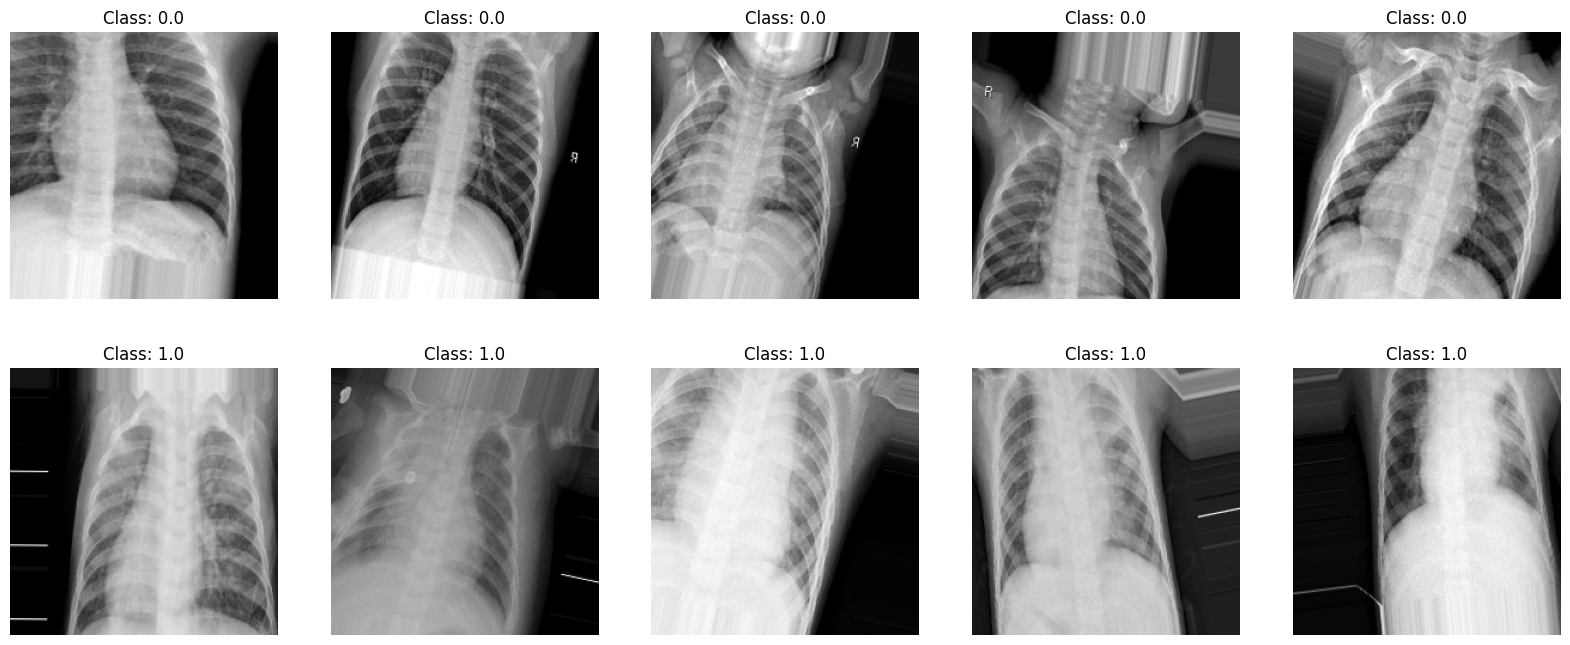


Class indices:
{'normal': 0, 'pneumonia': 1}

Shape of the data:
Input shape: (224, 224, 1)


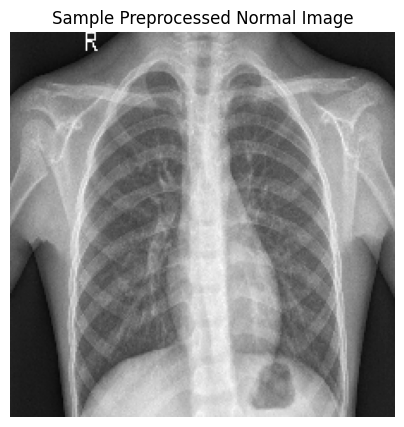

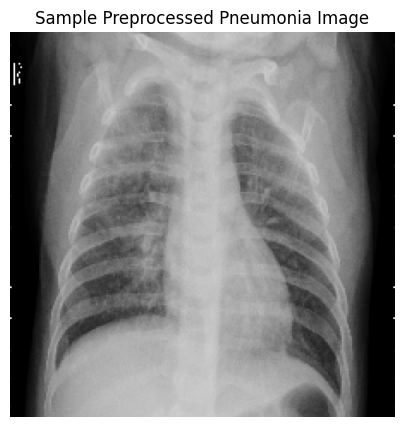

In [4]:
# Defining image dimensions
img_width, img_height = 224, 224

# Creating an ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    horizontal_flip=True,  # Random horizontal flip
    zoom_range=0.2  # Random zoom
)

# Creating an ImageDataGenerator for validation and test data -> only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Setting up generators for train split
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',  # Converting each image to grayscale
    shuffle=False  # Disabling shuffling to get the same images
)

# Setting up generators for Validation split
validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_path, 'val'),
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)
# Setting up generators for test split
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

# created a Function to preprocess a single image
def preprocess_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

# created a Function to display sample images from both classes
def display_images(generator, num_images=5, is_augmented=False):
    plt.figure(figsize=(20, 8))
    images, labels = next(generator)
    class_0_count = class_1_count = 0
    i = 0
    while class_0_count < num_images or class_1_count < num_images:
        if i >= len(images):
            images, labels = next(generator)
            i = 0
        image = images[i]
        label = labels[i]
        if (label == 0 and class_0_count < num_images) or (label == 1 and class_1_count < num_images):
            ax = plt.subplot(2, num_images, (1 if label == 0 else num_images+1) + (class_0_count if label == 0 else class_1_count))
            if is_augmented:
                image = train_datagen.random_transform(image)
            plt.imshow(image.reshape(img_width, img_height), cmap='gray')
            plt.title(f"Class: {labels[i]}")
            plt.axis('off')
            if label == 0:
                class_0_count += 1
            else:
                class_1_count += 1
        i += 1
    plt.show() # Displaying the images


# Displaying sample preprocessed and augmented images from the training set
print("Sample preprocessed images from the training set:\n")
display_images(train_generator)
print("Sample augmented images from the training set:")
display_images(train_generator, is_augmented=True)

# Displaying sample preprocessed and augmented images from the validation set
print("Sample preprocessed images from the validation set:")
display_images(validation_generator)
print("Sample augmented images from the validation set:")
display_images(validation_generator, is_augmented=True)

# Displaying sample preprocessed and augmented images from the test set
print("Sample preprocessed images from the test set:")
display_images(test_generator)
print("Sample augmented images from the test set:")
display_images(test_generator, is_augmented=True)

# Printing the class indices
print("\nClass indices:")
print(train_generator.class_indices)

# Printing the shape of the data
print("\nShape of the data:")
print(f"Input shape: {train_generator.image_shape}")

# Displaying the sample preprocessed image from each class
for class_name in ['normal', 'pneumonia']:
    sample_img_path = os.path.join(base_path, 'train', class_name, os.listdir(os.path.join(base_path, 'train', class_name))[0])
    preprocessed_img = preprocess_image(sample_img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(preprocessed_img.reshape(img_width, img_height), cmap='gray')
    plt.title(f"Sample Preprocessed {class_name.capitalize()} Image")
    plt.axis('off')
    plt.show()

### 3. Build a CNN Model

To build a CNN model for chest X-ray classification, we can use either a custom CNN or transfer learning with a pre-trained model. Here are implementations for both options using TensorFlow/Keras:

#### 1: Custom CNN:

In [5]:
def create_custom_cnn(input_shape=(224, 224, 1)): #Creating the method for Custom CNN 
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Creating and compiling the model
custom_model = create_custom_cnn()
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing model summary
custom_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,824,769 (10.78 MB)

 Trainable params: 2,824,769 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

#### 2: Transfer Learning with VGG16

In [6]:
def create_transfer_learning_model(input_shape=(224, 224, 3)): #Defining the Method for VGG16
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=output)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    return model #Returning the Model output 

# Creating and compiling the model
transfer_model = create_transfer_learning_model()
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing model summary
transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Train the Model

####  1: Training the Custom CNN 

#### Train the Model :

In [9]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint

# Ensure the dataset is not empty
assert train_generator.samples > 0, "Training dataset is empty"
assert validation_generator.samples > 0, "Validation dataset is empty"

# Calculate steps per epoch and validation steps
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

# Compile the model with accuracy metrics
custom_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']  # Ensure 'val_accuracy' is available
)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_custom_cnn_model.keras',  # Path to save the best model
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only when the model improves
    mode='max',  # We are interested in maximizing validation accuracy
    verbose=1  # Print a message when a new best model is saved
)

# Train the model
history = custom_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Adjust epochs as needed
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[model_checkpoint]  # Include the ModelCheckpoint callback
)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6775 - loss: 0.5787
Epoch 1: val_accuracy improved from -inf to 0.81469, saving model to best_custom_cnn_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6780 - loss: 0.5782 - val_accuracy: 0.8147 - val_loss: 0.4418
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7560 - loss: 0.4692
Epoch 3: val_accuracy did not improve from 0.81469
110/110 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7561 - loss: 0.4691 - val_accuracy: 0.7105 - val_loss: 0.5676
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7522 - loss: 0.4816
Epoch 5: val_accuracy improved from 0.81469 to 0.86166, saving model to best_custom_cnn_model.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7525 - loss: 

#### Evaluate the Model:

In [10]:
# Evaluate on the test set
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8493 - loss: 0.4802
Test Loss: 0.3794826567173004
Test Accuracy: 0.8796928524971008


#### Visualize Training Results :

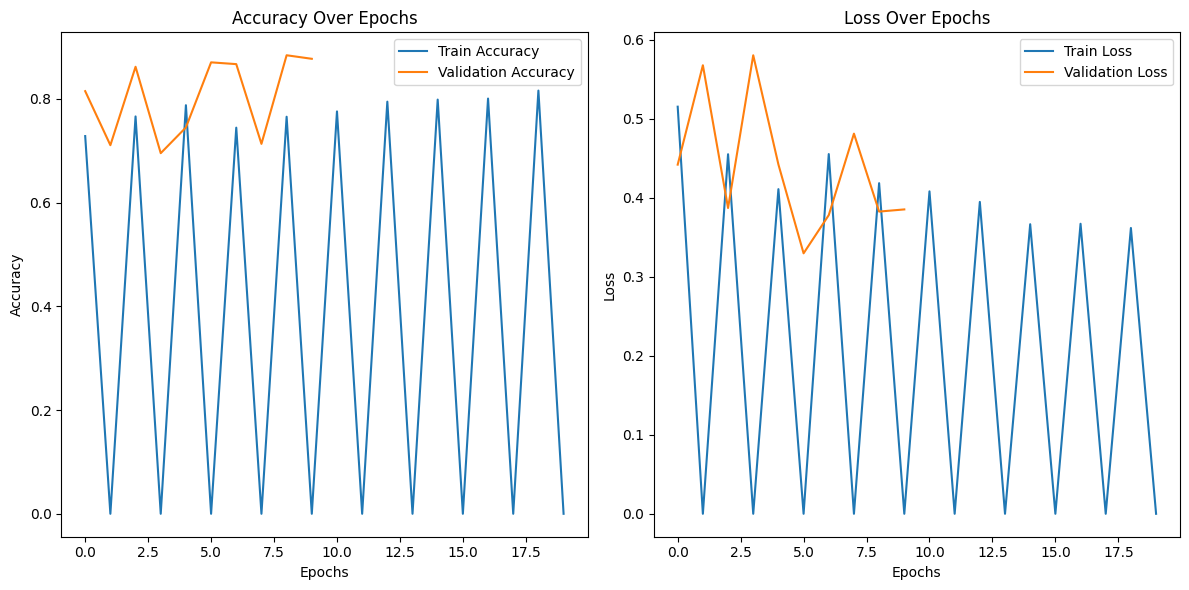

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### 2: Training the VGG16 

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to data directories
train_dir = "Final DataSet/train"
val_dir = "Final DataSet/val"
test_dir = "Final DataSet/test"

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1.0 / 255,  # Normalize pixel values
                                   rotation_range=20,  # Random rotation
                                   width_shift_range=0.2,  # Horizontal shift
                                   height_shift_range=0.2,  # Vertical shift
                                   zoom_range=0.2,  # Random zoom
                                   horizontal_flip=True)  # Random horizontal flip

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="rgb",  # RGB images
    class_mode="binary",  # Binary classification (pneumonia vs normal)
    batch_size=32
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32
)

# Load VGG16 pre-trained model without the top layers (including fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so they are not trained
base_model.trainable = False

# Add custom classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling to reduce dimensions
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
custom_vgg_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
custom_vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    'best_vgg_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

# Train the model
history = custom_vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Adjust as needed
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[model_checkpoint]  # Include the ModelCheckpoint callback
)


Found 3512 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/20
 27/110 ━━━━━━━━━━━━━━━━━━━━ 33:27 24s/step - accuracy: 0.5492 - loss: 0.6659

KeyboardInterrupt: 